In [38]:

from pandas import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

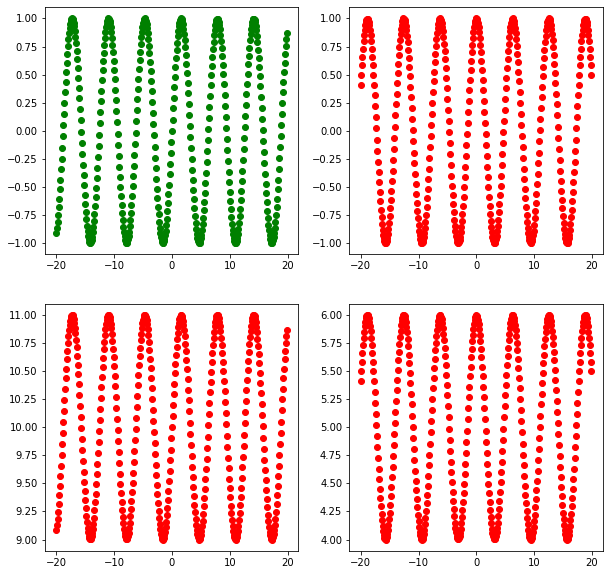

In [50]:

#data = pd.read_csv('data/ideal.csv', index_col=0, delimiter=',')

#data.plot()

data = pd.read_csv('data/ideal.csv', index_col=0, delimiter=',')

x = pd.DataFrame(data.index)
y1 = pd.DataFrame(data['y1'])
y2 = pd.DataFrame(data['y2'])
y3 = pd.DataFrame(data['y3'])
y4 = pd.DataFrame(data['y4'])


fig, axs = plt.subplots(2,2, figsize=(10,10))

axs[0, 0].plot(x, y1,'go')

axs[0, 1].plot(x, y2, 'ro')

axs[1, 0].plot(x, y3, 'ro')

axs[1, 1].plot(x, y4, 'ro')



<AxesSubplot:>

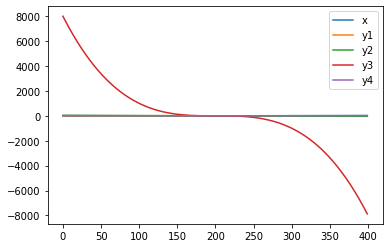

In [7]:
tdata = pd.read_csv('data/test.csv',  delimiter=',')

<AxesSubplot:>

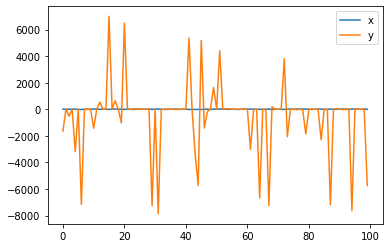

In [8]:
tdata.plot()